In [11]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models,layers
%matplotlib inline

In [12]:
names = os.listdir("/content/drive/My Drive/Colab Notebooks/optical/dataset")
names

['chha', 'ga', 'ja', 'da', 'i', 'la', 'e', 'tha', 'u', 'ka', 'cha', 'a']

In [13]:
x = []
y = []

for folder in names:
  files = os.listdir("/content/drive/My Drive/Colab Notebooks/optical/dataset/"+folder)
  for file in files:
    img = image.load_img("/content/drive/My Drive/Colab Notebooks/optical/dataset/"+folder+"/"+file,target_size=(100,100))
    img = image.img_to_array(img)
    #red_channel = img[:,:,2]
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #img = (img > 150) * 255
    #im_bin_192 = (img > 192) * 255
    x.append(img)
    y.append(names.index(folder))

x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)

(216, 100, 100, 3)
(216,)


In [14]:
# onehotencoding the labels
y = to_categorical(y)
print(y.shape)

(216, 12)


In [15]:
#scale the data
x = x/255
print(x.shape)

(216, 100, 100, 3)


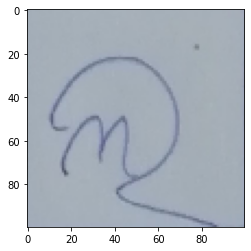

In [16]:
img = x[90]
plt.imshow(img, cmap = 'gray')
plt.show()

# CNN

In [17]:

#split the data into train and test set
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=5)

In [18]:

model = models.Sequential()

model.add(layers.Conv2D(filters=10,kernel_size=(3,3),padding = 'same', input_shape=(100, 100,3),activation = 'relu'))
model.add(layers.Conv2D(30,(5,5),activation='relu'))

model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(40,(3,3),activation='relu'))
model.add(layers.Conv2D(60,(3,3),activation='relu'))

model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(180,activation='relu'))

model.add(layers.Dropout(0.5))

model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(12,activation='softmax'))

In [19]:
# model.summary()

In [28]:

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy','mse'],)
history = model.fit(xtrain,ytrain,batch_size=25,epochs=50,validation_data=(xtest,ytest),)

Epoch 1/50
7/7 [==============================] - 0s 70ms/step - loss: 0.1985 - accuracy: 0.9302 - mse: 0.0078 - val_loss: 3.4110 - val_accuracy: 0.3409 - val_mse: 0.0839
Epoch 2/50
7/7 [==============================] - 0s 46ms/step - loss: 0.2278 - accuracy: 0.9535 - mse: 0.0079 - val_loss: 4.0338 - val_accuracy: 0.3409 - val_mse: 0.0853
Epoch 3/50
7/7 [==============================] - 0s 43ms/step - loss: 0.2514 - accuracy: 0.9186 - mse: 0.0101 - val_loss: 3.0672 - val_accuracy: 0.3409 - val_mse: 0.0797
Epoch 4/50
7/7 [==============================] - 0s 41ms/step - loss: 0.2474 - accuracy: 0.9302 - mse: 0.0102 - val_loss: 3.4750 - val_accuracy: 0.2955 - val_mse: 0.0866
Epoch 5/50
7/7 [==============================] - 0s 40ms/step - loss: 0.2315 - accuracy: 0.9419 - mse: 0.0081 - val_loss: 3.1823 - val_accuracy: 0.3636 - val_mse: 0.0788
Epoch 6/50
7/7 [==============================] - 0s 40ms/step - loss: 0.1699 - accuracy: 0.9535 - mse: 0.0073 - val_loss: 3.8568 - val_accuracy:

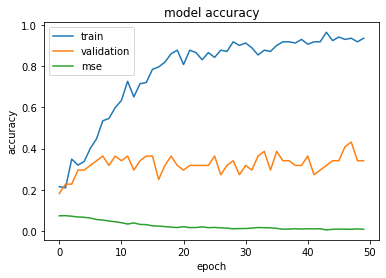

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['mse'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation','mse'], loc='upper left')
plt.show()

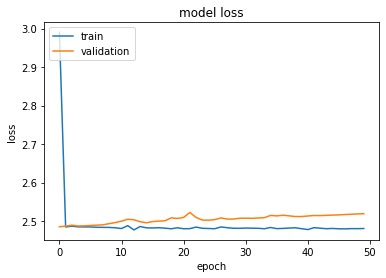

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# SVM

# ResNet50

In [ ]:
from tensorflow.keras.applications import resnet50

model2 = resnet50.ResNet50(weights='imagenet')
#model2.summary()

In [ ]:
# load the model without last layer

input_layer = layers.Input(shape=(200,200,3))

model2 = resnet50.ResNet50(weights='imagenet',include_top=False,input_tensor=input_layer)
#model2.summary()

In [ ]:

last_layer = model2.output

flat = layers.Flatten()(last_layer)
output_layer = layers.Dense(12,activation='softmax')(flat)

new_model = models.Model(inputs=input_layer,outputs=output_layer)
#new_model.summary()

In [ ]:
for layer in new_model.layers[:-1]:
  layer.trainable=False

In [ ]:
#new_model.summary()


In [ ]:
x = []
y = []

for folder in names:
  files = os.listdir("/content/drive/My Drive/Colab Notebooks/optical/dataset/"+folder)
  for file in files:
    img = image.load_img("/content/drive/My Drive/Colab Notebooks/optical/dataset/"+folder+"/"+file,target_size=(200,200))
    img = image.img_to_array(img)
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #img = (img > 150) * 255
    img = resnet50.preprocess_input(img)
    x.append(img)
    y.append(names.index(folder))


x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)

(216, 200, 200, 3)
(216,)


In [ ]:

# onehotencoding the labels
y = to_categorical(y)
print(y.shape)

(216, 12)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


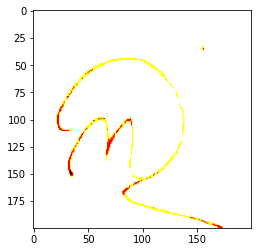

In [ ]:
img = x[90]
plt.imshow(img, cmap = 'gray')
plt.show()

In [ ]:
#split the data into train and test set
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.1,random_state=5)

In [ ]:
new_model.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])
#new_model.fit(xtrain,ytrain,batch_size=32,epochs=20,validation_data=(xtest,ytest))

In [ ]:
history = new_model.fit(xtrain,ytrain,batch_size=32,epochs=30,validation_data=(xtest,ytest))

Epoch 1/30
7/7 [==============================] - 1s 187ms/step - loss: 109.7576 - accuracy: 0.1134 - val_loss: 242.3687 - val_accuracy: 0.1364
Epoch 2/30
7/7 [==============================] - 1s 73ms/step - loss: 201.9962 - accuracy: 0.1701 - val_loss: 134.6019 - val_accuracy: 0.2727
Epoch 3/30
7/7 [==============================] - 1s 73ms/step - loss: 102.2176 - accuracy: 0.3351 - val_loss: 393.4872 - val_accuracy: 0.0909
Epoch 4/30
7/7 [==============================] - 1s 72ms/step - loss: 131.4414 - accuracy: 0.4227 - val_loss: 267.3512 - val_accuracy: 0.0909
Epoch 5/30
7/7 [==============================] - 1s 73ms/step - loss: 85.9791 - accuracy: 0.4794 - val_loss: 67.0119 - val_accuracy: 0.3182
Epoch 6/30
7/7 [==============================] - 1s 73ms/step - loss: 30.3894 - accuracy: 0.6804 - val_loss: 255.9423 - val_accuracy: 0.1364
Epoch 7/30
7/7 [==============================] - 1s 74ms/step - loss: 90.7394 - accuracy: 0.6289 - val_loss: 39.4936 - val_accuracy: 0.6364
Epo

In [ ]:
# plt.plot(history.history['loss'])

In [ ]:
# plt.plot(history.history['val_loss'])

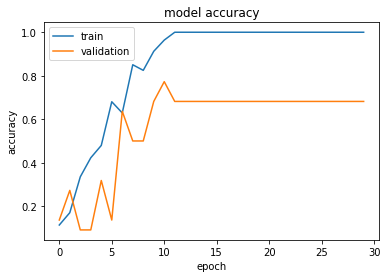

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

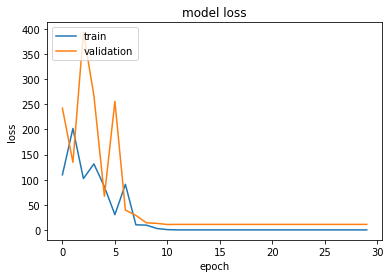

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# from sklearn import metrics

# # Model Accuracy: how often is the classifier correct?
# print("Accuracy:",metrics.accuracy_score(ytest, y_pred))
# # Model Precision: what percentage of positive tuples are labeled as such?
# print("Precision:",metrics.precision_score(y_test, y_pred))

# # Model Recall: what percentage of positive tuples are labelled as such?
# print("Recall:",metrics.recall_score(y_test, y_pred))

# VGG 16

In [ ]:

from keras.applications.vgg16 import VGG16
#model = VGG16()

In [ ]:
from keras.applications.vgg16 import VGG16
model = VGG16()
#print(model.summary())

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.utils.vis_utils import plot_model
model = VGG16()
#plot_model(model, to_file='/content/drive/My Drive/Colab Notebooks/optical/vgg.png')

In [ ]:
# input_layer = layers.Input(shape=(200,200,3))

# model = vgg16.VGG16(weights='imagenet',include_top=False,input_tensor=input_layer)
# model.summary()
model = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_tensor=input_layer)
#model.summary()

In [ ]:

last_layer = model.output

flat = layers.Flatten()(last_layer)
output_layer = layers.Dense(12,activation='softmax')(flat)

new_model = models.Model(inputs=input_layer,outputs=output_layer)
#new_model.summary()

In [ ]:
for layer in new_model.layers[:-1]:
  layer.trainable=False

In [ ]:
#new_model.summary()


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
x = []
y = []

for folder in names:
  files = os.listdir("/content/drive/My Drive/Colab Notebooks/optical/dataset/"+folder)
  for file in files:
    img = image.load_img("/content/drive/My Drive/Colab Notebooks/optical/dataset/"+folder+"/"+file,target_size=(200,200))
    img = image.img_to_array(img)
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #img = (img > 150) * 255
    img = preprocess_input(img)
    x.append(img)
    y.append(names.index(folder))


x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)

(216, 200, 200, 3)
(216,)


In [ ]:

# onehotencoding the labels
y = to_categorical(y)
print(y.shape)

(216, 12)


In [ ]:
#split the data into train and test set
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.1,random_state=5)

In [ ]:

new_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = new_model.fit(xtrain,ytrain,batch_size=32,epochs=30,validation_data=(xtest,ytest))

Epoch 1/30
7/7 [==============================] - 1s 133ms/step - loss: 10.0794 - accuracy: 0.1753 - val_loss: 7.7671 - val_accuracy: 0.4091
Epoch 2/30
7/7 [==============================] - 1s 112ms/step - loss: 5.2634 - accuracy: 0.5670 - val_loss: 3.9162 - val_accuracy: 0.5000
Epoch 3/30
7/7 [==============================] - 1s 111ms/step - loss: 1.8041 - accuracy: 0.7629 - val_loss: 4.5678 - val_accuracy: 0.5909
Epoch 4/30
7/7 [==============================] - 1s 112ms/step - loss: 1.1892 - accuracy: 0.8608 - val_loss: 7.1271 - val_accuracy: 0.5455
Epoch 5/30
7/7 [==============================] - 1s 114ms/step - loss: 0.3710 - accuracy: 0.9227 - val_loss: 4.6996 - val_accuracy: 0.5909
Epoch 6/30
7/7 [==============================] - 1s 112ms/step - loss: 0.1267 - accuracy: 0.9845 - val_loss: 4.2933 - val_accuracy: 0.6364
Epoch 7/30
7/7 [==============================] - 1s 112ms/step - loss: 0.1139 - accuracy: 0.9794 - val_loss: 3.4890 - val_accuracy: 0.7273
Epoch 8/30
7/7 [===

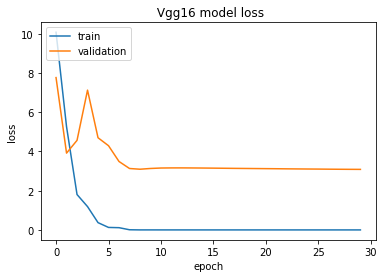

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title(' Vgg16 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

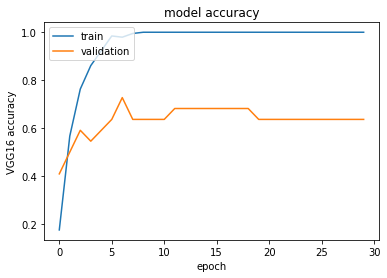

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('VGG16 accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243
